# ESAME TRMD - Pian Sebastiano

CONSEGNA

PARTE 1 

Come prima cosa chiamo i pacchetti necessari.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import poisson
from scipy.stats import norm
import emcee
import pygtc
from scipy.optimize import minimize

Definisco le funzioni necessarie a descrivere il profilo di densità.

In [100]:
rhom = 0.286*((0.7)**2)*(2.7751428946)*(10**11)
Ms = 2*(10**30)

def f(c):
    return np.ln(1+c) - c/(1+c)

def delc(c):
    return 200*(c**3)/(3*f(c))

def rhos(z,c):
     return rhom*((1+z)**3)*delc(c)
 
def rs(M,c,z):
    return  (((3*M)/(4*np.pi*200*rhom*((1+z)**3)))**(1/3))/c

def f(x):
    if x < 1:
        return (1-(2*np.arctanh(((1-x)/(1+x))**(1/2))/((1-x**2)**(1/2))))/(x**2 - 1)
    if x > 1:
        return (1-(2*np.arctanh(((x-1)/(1+x))**(1/2))/((x**2 - 1)**(1/2))))/(x**2-1)
    if x == 1:
         return 1/3
    
def Sigma(R,M,c,z): 
  return 2*rs(M,c,z)*rhos(z,c)*f(R/rs(M,c,z))

# Sigma profilo di densità proiettato degli aloni di materia oscura
# M massa dell'alone
#c densità dell'alone
#rs raggio caratteristico dell'ammasso
#rhom densità medi universo
#rhos densità caratteristica dell'ammasso
# R distanza da centro alone


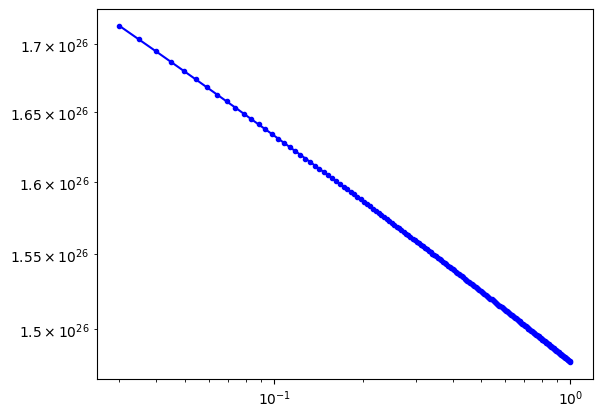

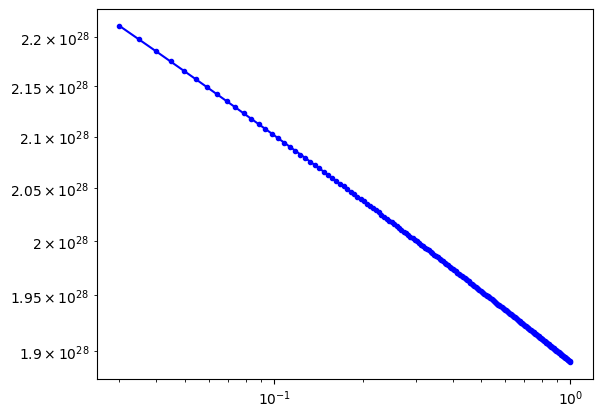

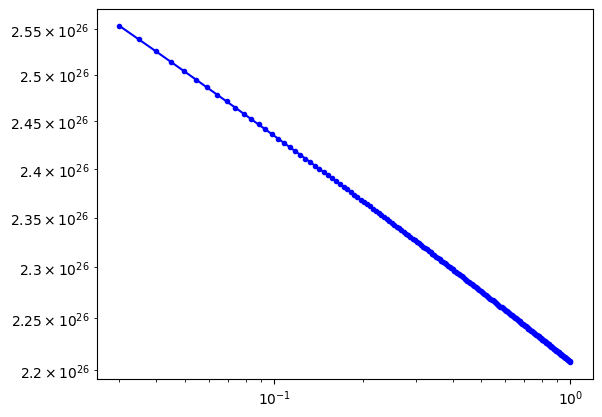

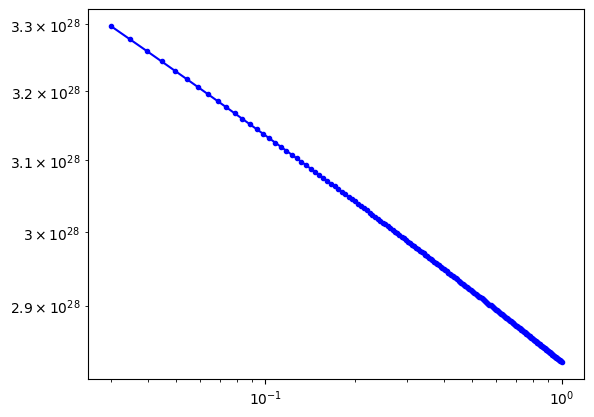

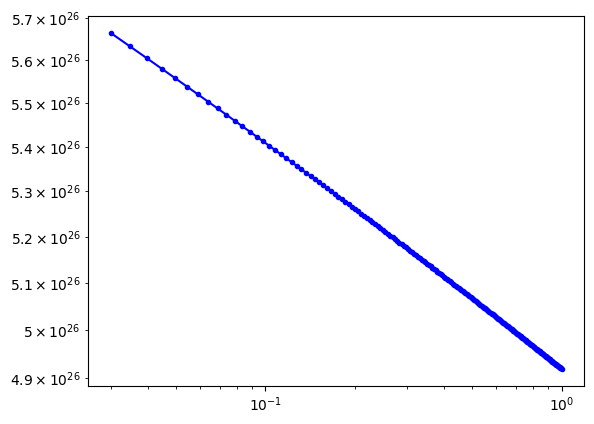

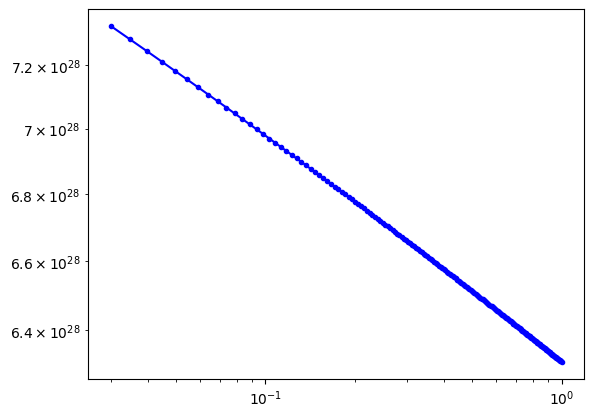

In [115]:

M = [Ms*10**(13.5), Ms*10**(14), Ms*10**(15)]
c= [2.5,10]
z= 0.0  
R= np.linspace(0.03,1, 200)  
    
for i in range(3):
     for j in range(2):
        
        m= M[i]
        C = c[j]
        Sigma_values  = [Sigma(r,m, C, z) for r in R]

        plt.scatter(R, Sigma_values, marker='.', linestyle='-', color='b')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlabel('')
        plt.ylabel('')
        plt.title('')
        plt.show()